# Sathvik Radhakrishnan

## Research question/interests

I would like to know the relationships between different parameters (nationality, age, position, speed) and their relationship to a players market value.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(font_scale=2)

In [2]:
%load_ext autoreload
%autoreload 2

## Exploratory Data Analysis

In [3]:
#Loading the data set
df = pd.read_csv("../data/raw/FIFA22_official_data.csv")

In [4]:
#Getting basic information about dataset
print(df.head(5))
print(df.shape)
print(df.columns)

       ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580        L. Suárez   34   
3  192985     K. De Bruyne   30   
4  224334         M. Acuña   29   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   
3  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium   
4  https://cdn.sofifa.com/players/224/334/22_60.png   Argentina   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   
3  https://cdn.sofifa.com/flags/be.png       91         91   
4  https://cdn.sofifa.com/flags/ar.png       84         84   

             

In [5]:
#To see the number of unique entries
df.nunique(axis=0)

ID                     16710
Name                   16089
Age                       30
Photo                  16710
Nationality              168
                       ...  
GKReflexes                74
Best Position             15
Best Overall Rating       51
Release Clause          1170
DefensiveAwareness        90
Length: 65, dtype: int64

We can see that there a total of 16710 players in the dataset. The deviation of the age of all players is 30.

In [6]:
#To see the number of countries included in the game and the sorted list of countries
print(len(df.Nationality.unique()))

168


In [7]:
#Function to clean up the currenncy columns

def convert_currency_to_number(value):
    '''Converts currency from a string with currency logo and short form for million and kilo to only numbers'''
    value = str(value).strip('€')
    if "M" in value:
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000000
    elif "K" in value: 
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000
    return(float(value))

In [8]:
#The value is a string, need to remove euro symbol and convert to double
#Also convert M and K to their numberical values
df['Value'] = df['Value'].map(lambda x: convert_currency_to_number(x))
print(df.Value)

#The value of the players are now in float format and dont have the unnecessary symbols

0       1075000000.00000
1         93000000.00000
2        445000000.00000
3       1255000000.00000
4         37000000.00000
              ...       
16705       100000.00000
16706       180000.00000
16707       100000.00000
16708       110000.00000
16709            0.00000
Name: Value, Length: 16710, dtype: float64


Text(0, 0.5, 'Country')

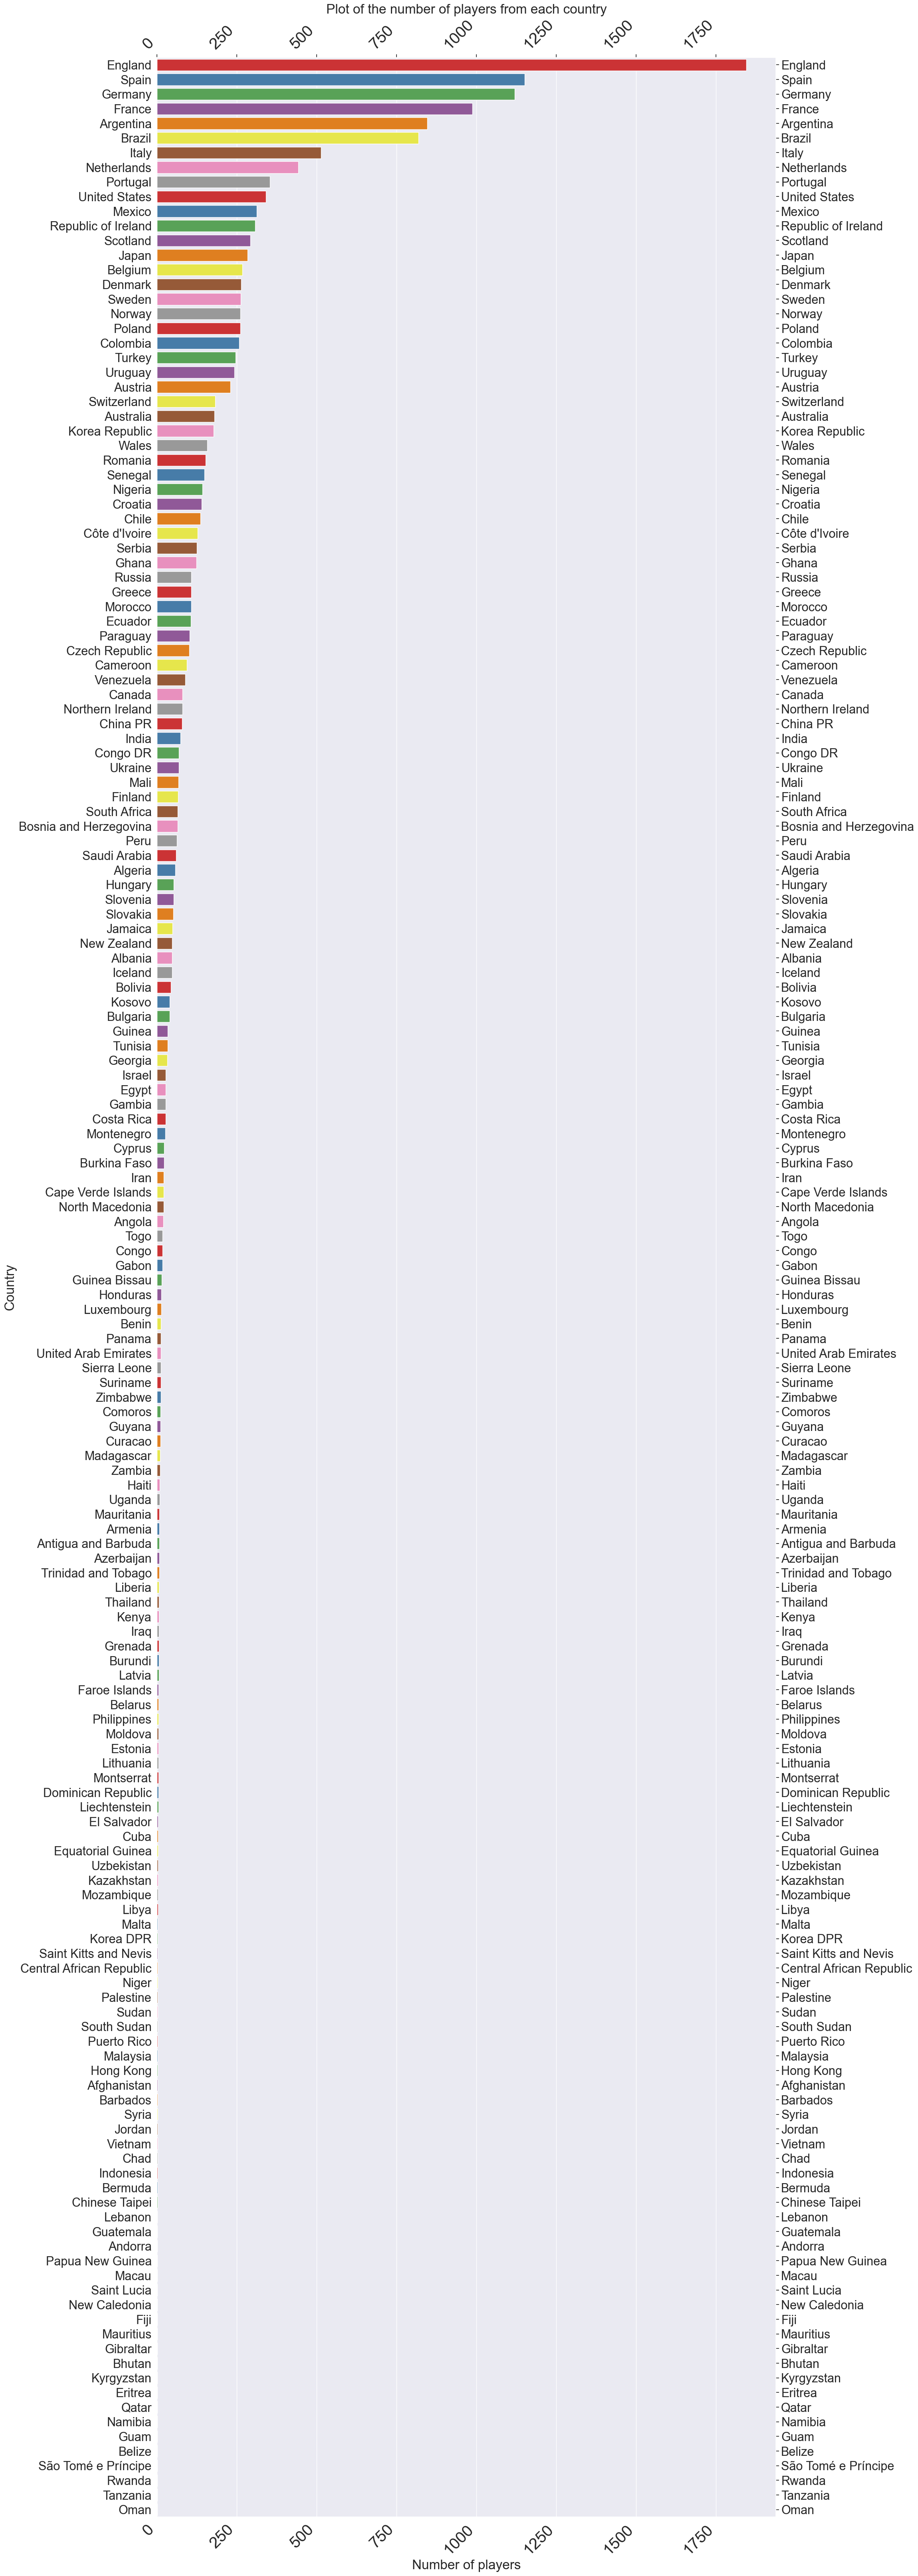

In [9]:
#Plot to see which country has the most number of players

plt.figure(figsize=(20,80));
chart = sns.countplot(
    data=df,
    y='Nationality',
    palette='Set1',
    order = df['Nationality'].value_counts().index
);

plt.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

plt.title("Plot of the number of players from each country")
plt.xlabel("Number of players")
plt.ylabel("Country")

# Looks like England has the highest followed by Spain and Germany

Text(0.5, 1.0, 'Plot of the dristribution of players age and value')

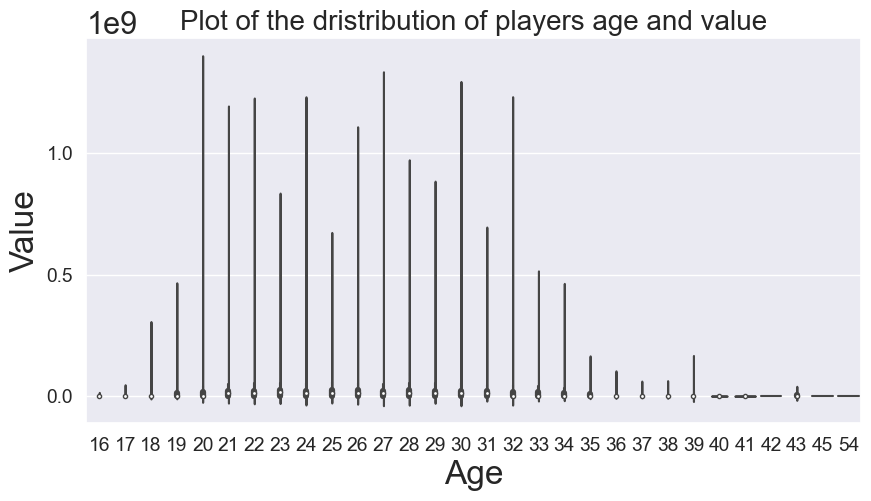

In [10]:
#Distribution of age and value
plt.figure(figsize=(10,5))
chart = sns.violinplot(x='Age',y='Value',data=df)

plt.xticks(
    fontsize='xx-small'  
);

plt.yticks(
    fontsize='xx-small'  
);


plt.title("Plot of the dristribution of players age and value", fontsize = 20)

#I can see that the value of a player is at the hidgest when they are between 20 - 30 years old

Text(0, 0.5, 'Wage')

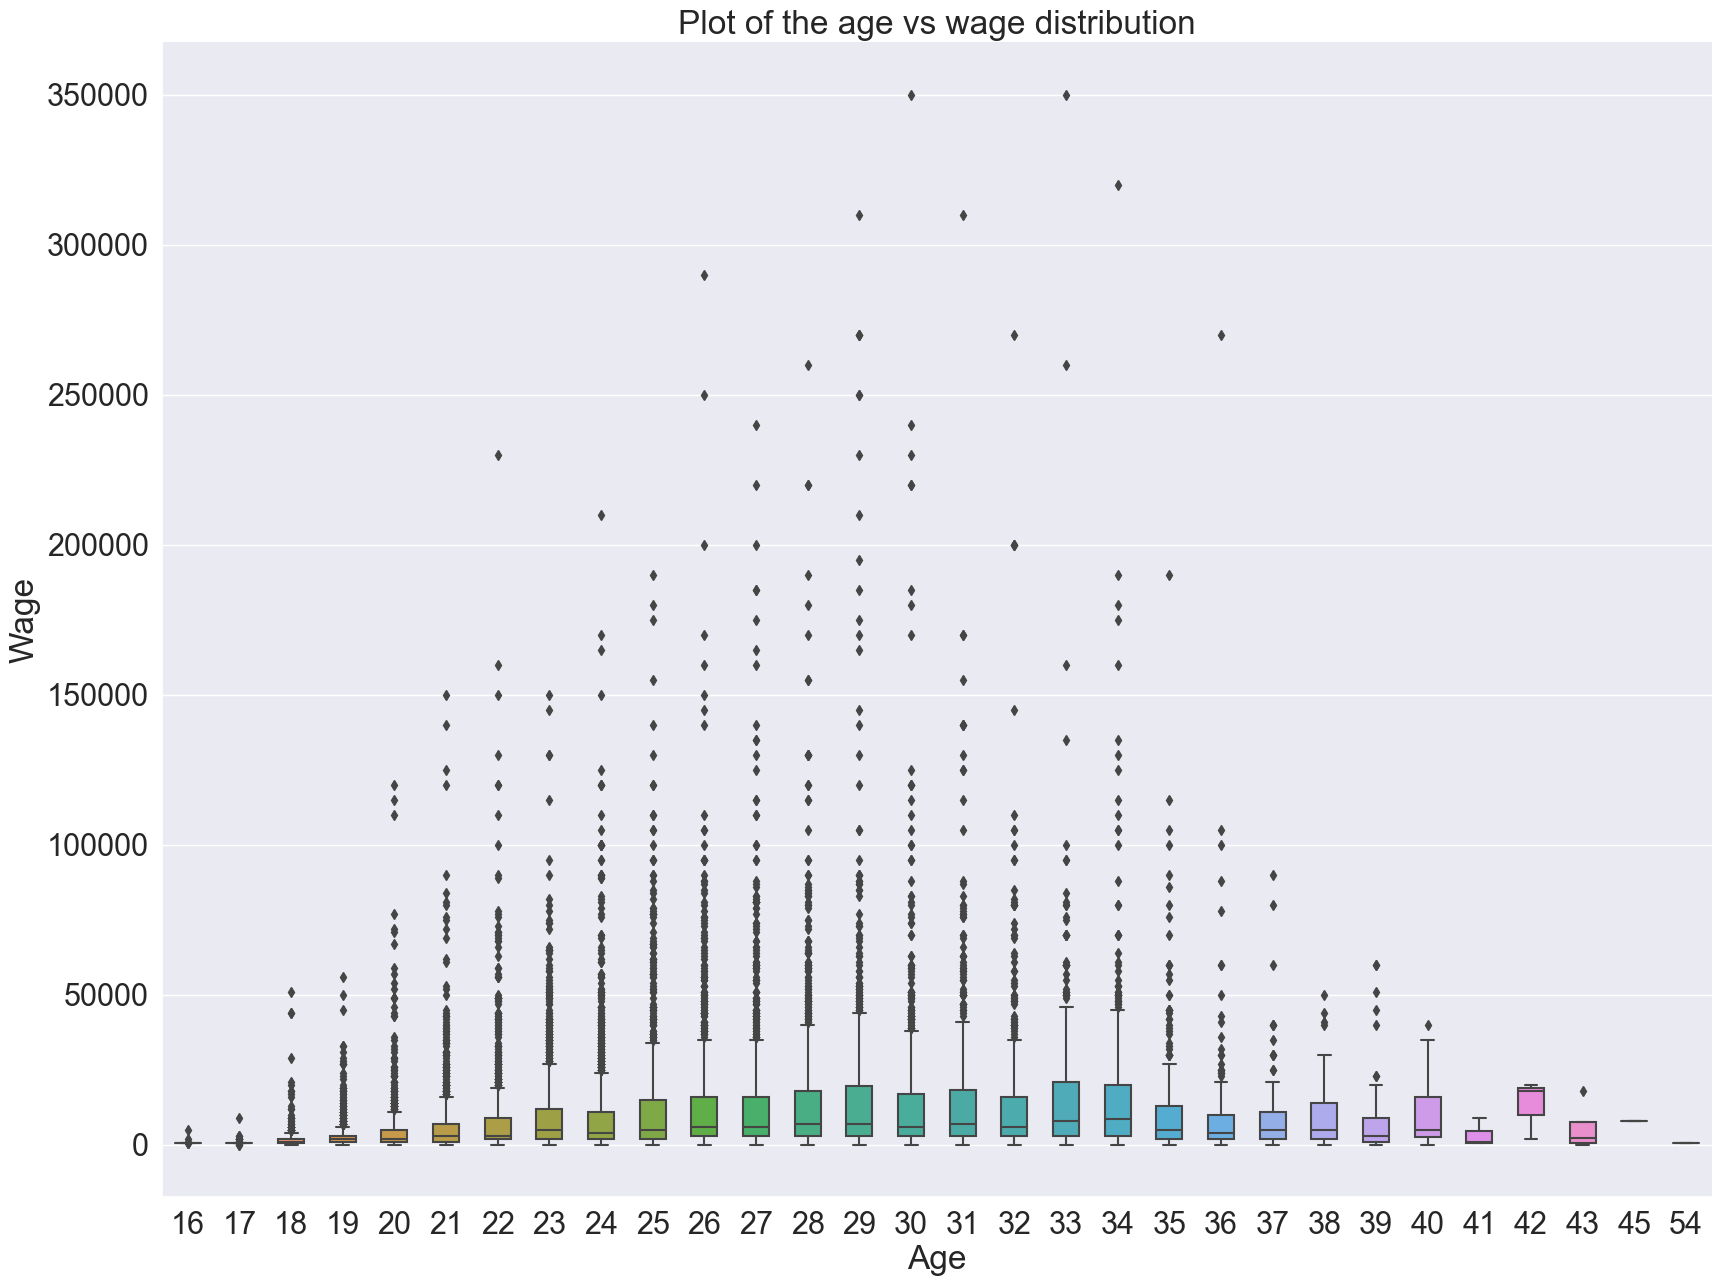

In [11]:
#Age vs Wage 
df['Wage'] = df['Wage'].map(lambda x: convert_currency_to_number(x))

plt.figure(figsize=(20,15));
chart = sns.boxplot(x='Age', y='Wage', data=df,
          width=0.5);
sns.despine()

plt.title("Plot of the age vs wage distribution")
plt.xlabel("Age")
plt.ylabel("Wage")


#We can see that there is a litte correalion between the age and wage. I will explore this later using a heat map

In [12]:
def clean_position(pos):
    """Function to clean the position column of the data set to extract important information"""
    if isinstance(pos, str) == False:
        pos_cleaned = "NA"
    else:
        pos_cleaned = ''.join([a for a in pos if a.isupper()])
    return pos_cleaned

df['Position'] = df['Position'].map(lambda x: clean_position(x))


C:\Users\sathv\AppData\Local\Temp\ipykernel_3000\573870788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = df[['Overall','Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Value', 'Wage', 'Age', ]].corr()


Text(32.249999999999986, 0.5, 'Wage')

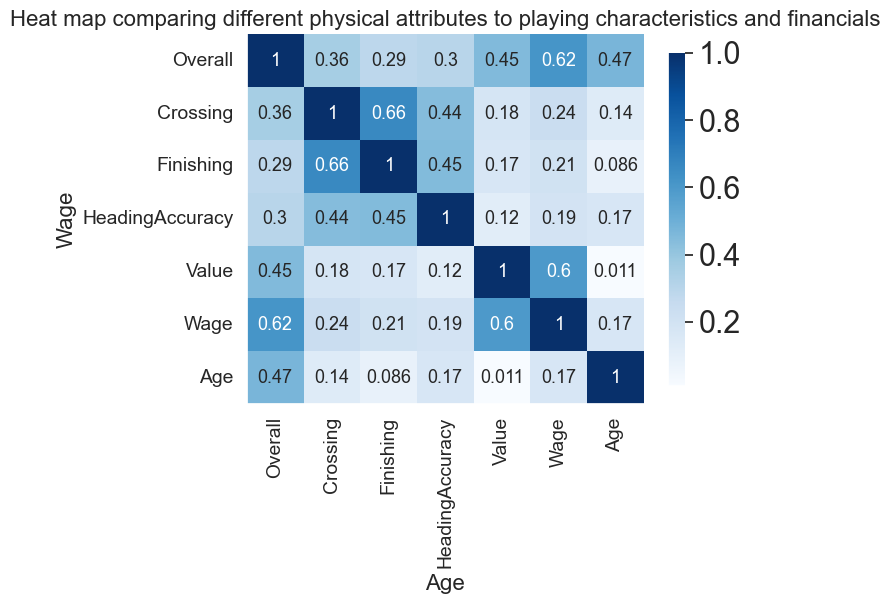

In [13]:
heat = df[['Overall','Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Value', 'Wage', 'Age', ]].corr()
sns.heatmap(heat, annot=True, cmap='Blues',             
            annot_kws={
                'fontsize': 13
            },
           cbar_kws={'shrink': 0.9})
sns.despine()

plt.xticks(fontsize='xx-small')
plt.yticks(fontsize='xx-small')

plt.title("Heat map comparing different physical attributes to playing characteristics and financials", fontsize = 16)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Wage", fontsize = 16)


#We can see that wage and value have minimal with age

## Data Analysis
I would like to analyse the relationship between player value to different parameters.

First, let us get the cleaned data

In [14]:
#Importing the function python file
import project_functions1 as pf1

#Loading the data and printing the first few line


df = pd.read_csv("../data/raw/FIFA22_official_data.csv")
print(df[df["Name"]=="H. Kane"].Value)

data = pf1.get_cleaned_data("../data/raw/FIFA22_official_data.csv")
data.head()
print(data[data["Name"]=="H. Kane"].Value)

39      €129.5M
5557      €1.9M
Name: Value, dtype: object
39     129500000.00000
5557     1900000.00000
Name: Value, dtype: float64


I think the players' value is very much dependent on their age. I also want to see how much correlation it has to their current wage. I will use the heat map from my EDA start this analysis.

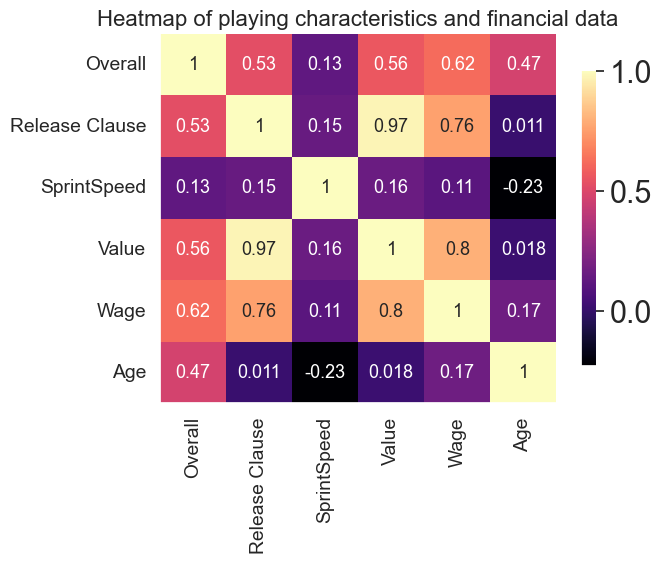

In [15]:
heat = data[['Overall', 'Release Clause', 'SprintSpeed', 'Value', 'Wage', 'Age' ]].corr()
sns.heatmap(heat, annot=True, cmap='magma',            
            annot_kws={
                'fontsize': 13
            },
           cbar_kws={'shrink': 0.8})
sns.despine()

plt.xticks(fontsize='xx-small')
plt.yticks(fontsize='xx-small')

plt.title("Heatmap of playing characteristics and financial data", fontsize = 16)

sns.despine()

Findings:

I notice that the age of a player barely has any correlation with the players value and release clause. But Age plays a significant role in the overall of a player.
We can also see that the overall rating of a player has a greater effect on their wage than value. And since age has a correlation with overall, we can say that even though it is not apparent in the heatmap, there is some correlation between the age and value.
I also see strong connections of the release clause with value and wage.

I would like to plot the relationship between wage and value.

Text(67.0, 0.5, 'Value')

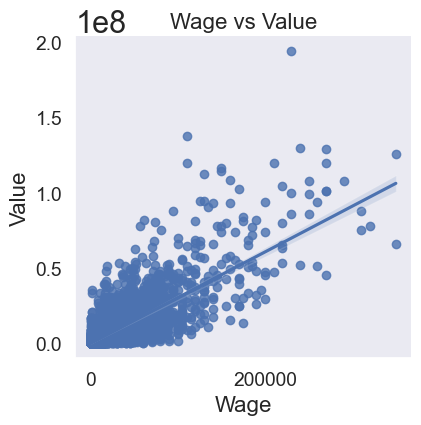

In [16]:
#Plotting relationship between value and wage
sns.set_style("dark")
sns.lmplot(x='Wage', y='Value', data=data)
sns.despine()

plt.xticks(fontsize='xx-small')
plt.yticks(fontsize='xx-small')

plt.title("Wage vs Value", fontsize = 16)
plt.xlabel("Wage", fontsize = 16)
plt.ylabel("Value", fontsize = 16)

We can see that there is a linear relationship between the value and the wage of a player. There are a few outliers but most of the players are close to the line.


Let me also see the relationship between release clause and wage

Text(92.375, 0.5, 'Release Clause')

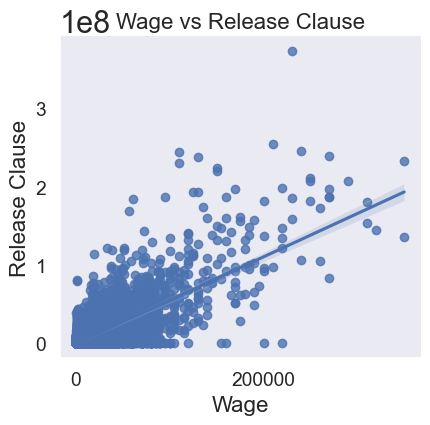

In [17]:
sns.lmplot(x='Wage', y='Release Clause', data=data)
sns.despine()

plt.xticks(fontsize='xx-small')
plt.yticks(fontsize='xx-small')

plt.title("Wage vs Release Clause", fontsize = 16)
plt.xlabel("Wage", fontsize = 16)
plt.ylabel("Release Clause", fontsize = 16)

I do not get much information from these graphs other than that there seems to be somewhat of a linear trend. There are some outlier but we don't get any meaningful information from these two plots as there are a lot of data points.

At this point, I also want to look at how players values are based on their country.

In [29]:
#Making 2 new data frames to to see the relationship between a country and its total wage as well as its total value

list_of_countries = list(data.Nationality.unique())

total_value_by_country = dict.fromkeys(list_of_countries,0)
total_wage_by_country = dict.fromkeys(list_of_countries,0)
 
for ind in data.index:
    total_value_by_country[data['Nationality'][ind]]+=data['Value'][ind]
    total_wage_by_country[data['Nationality'][ind]]+=data['Wage'][ind]

total_value_by_country_df = pd.DataFrame(list(total_value_by_country.items()), columns = ['Country', 'Total Value'])
total_wage_by_country_df = pd.DataFrame(list(total_wage_by_country.items()), columns = ['Country', 'Total Wage'])

We have got our required data frame. Now let us plot them using a bar plot.
First the total value. I am plotting on the top 10 so as to not clutter the visualization and to make the x-axis more readable. The yop 10 values are what we need for this analysis as well.

Text(0, 0.5, 'Total Value')

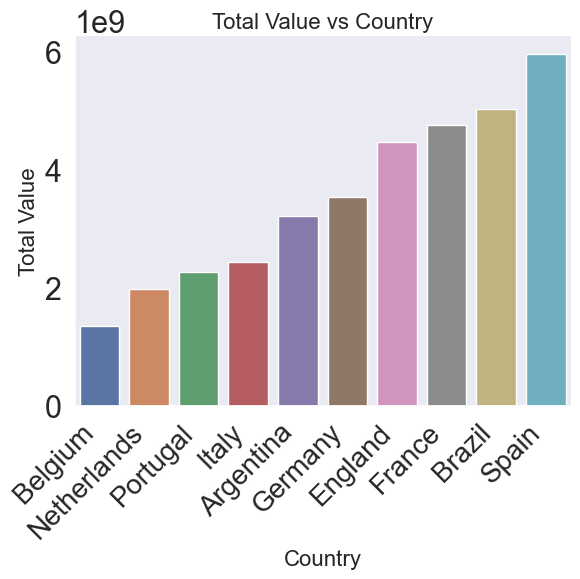

In [19]:
#plt.figure(figsize=(100,15));
chart = sns.barplot(data=total_value_by_country_df.sort_values("Total Value").tail(10), x="Country", y="Total Value")  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'
);


plt.title("Total Value vs Country", fontsize = 16)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Total Value", fontsize = 16)


From the above graph, we can see that the total value of players from Spain is the highest. Followed by Brazil, France and England. All the countries in the top 10 are in Europe and South America.

Now let us compare the total wages.

Text(0, 0.5, 'Total Wage')

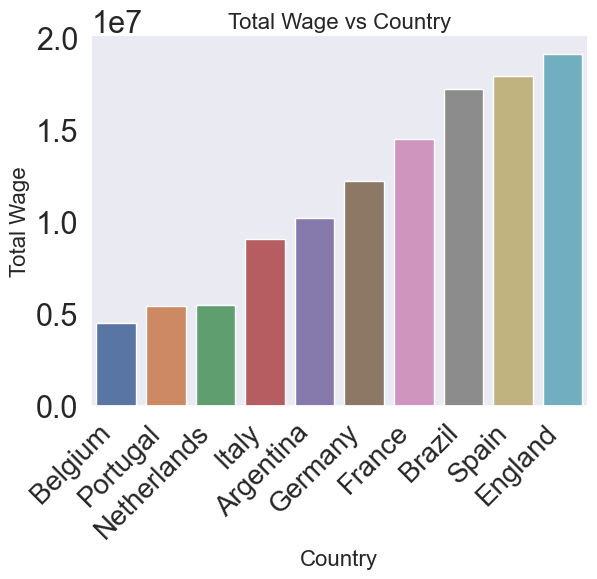

In [20]:
#plt.figure(figsize=(100,15));
chart = sns.barplot(data=total_wage_by_country_df.sort_values("Total Wage").tail(10), x="Country", y="Total Wage")  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);

plt.title("Total Wage vs Country",fontsize = 16)
plt.xlabel("Country",fontsize = 16)
plt.ylabel("Total Wage",fontsize = 16)

From the above graph, we can see that the total wage of players from England is the highest. Followed by Spain, Brazil and France. All the countries in the top 10 are in Europe and South America.

In the next tab, we will plot avg. wage and avg. value vs the nationality of the players

C:\Users\sathv\AppData\Local\Temp\ipykernel_3000\2348226064.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(data=data.sort_values("Wage").tail(10), x="Nationality", y="Wage", ci=None)
C:\Users\sathv\AppData\Local\Temp\ipykernel_3000\2348226064.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(data=data.sort_values("Value").tail(10), x="Nationality", y="Value", ci=None)


Text(0, 0.5, 'Avg. Value')

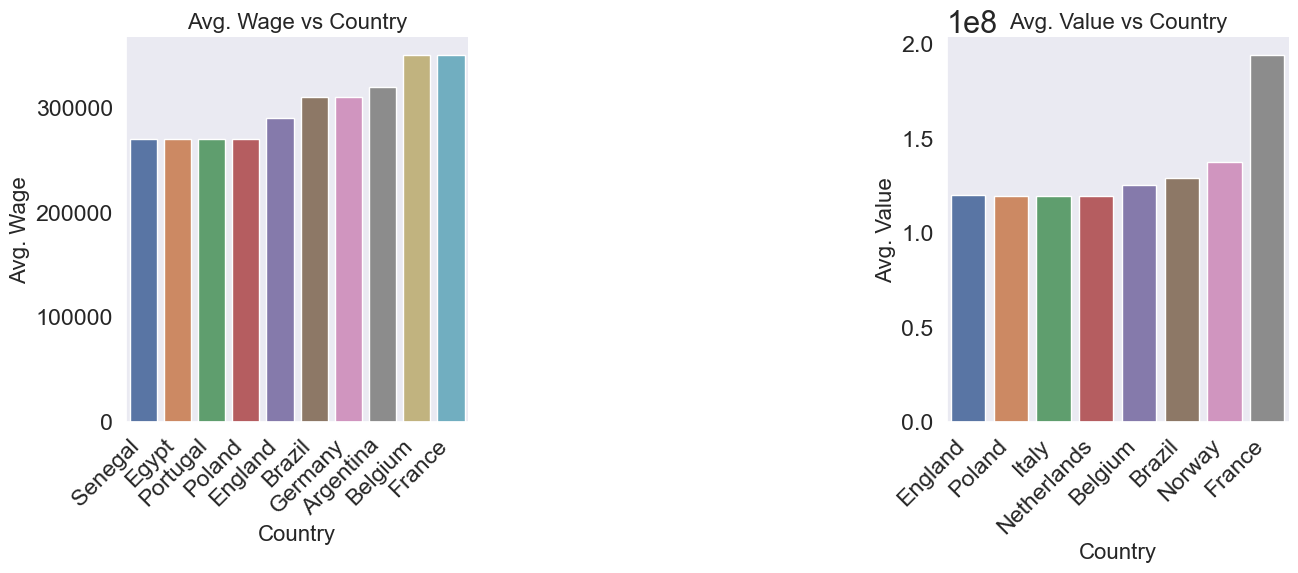

In [21]:
plt.figure(figsize=(15,5));
plt.subplot(1, 3, 1) 
chart = sns.barplot(data=data.sort_values("Wage").tail(10), x="Nationality", y="Wage", ci=None)  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
);

plt.yticks(fontsize = 'x-small')

plt.title("Avg. Wage vs Country",fontsize = 16)
plt.xlabel("Country", fontsize = 16)
plt.ylabel("Avg. Wage", fontsize = 16)

plt.subplot(1, 3, 3)
#plt.figure(figsize=(100,15));
chart = sns.barplot(data=data.sort_values("Value").tail(10), x="Nationality", y="Value", ci=None)  
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
);

plt.yticks(fontsize = 'x-small')

plt.title("Avg. Value vs Country",fontsize = 16)
plt.xlabel("Country",fontsize = 16)
plt.ylabel("Avg. Value",fontsize = 16)

We can make some findings from these graphs. Although England has by far the most number of players in the game, the most valuable countries are Spain and Brazil. We also noticed a correlation to the players overall and value and we can make an assumption that the overall quality of players from Spain and Brazil are higher than that of England. This can also be seen in case of the wage as the total wages are almost the same. 
<br/>
We also see that the top 8 countries in both categories are from Europe and South America.

I would also like to see if physical attributes have an effect on value. For this we will use a heat map again as it gives us the most detail.


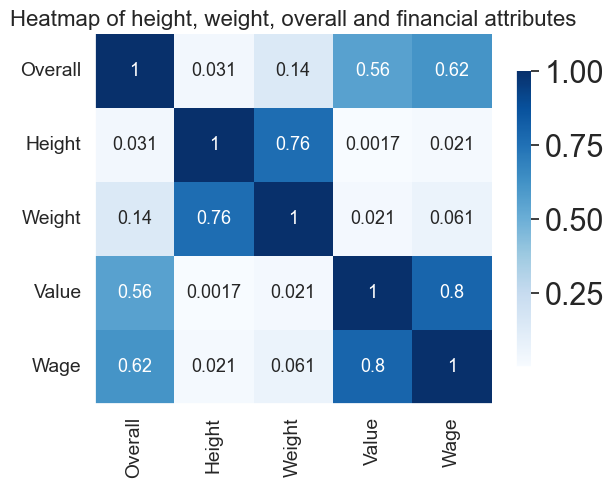

In [22]:
heat = data[['Overall', 'Height', 'Weight', 'Value', 'Wage', ]].corr()
sns.heatmap(heat, annot=True, cmap='Blues',            
            annot_kws={
                'fontsize': 13
            },
           cbar_kws={'shrink': 0.8})
sns.despine()

plt.xticks(fontsize='xx-small')
plt.yticks(fontsize='xx-small')

plt.title("Heatmap of height, weight, overall and financial attributes", fontsize = 16)
sns.despine()

We see that physical attributes such as height and weight have no correlation with a players value and the values in the heat map are very close to 0 indicating that there is no correlation. As expected, height and weight have a strong correlation as well as value and wage. There is also some correlation between a players overall with value and wage.

Now let us see the relationship between a players position and their average value. We will drop SUB, RES and NA as they are irrelevent positions.

In [23]:
list_of_positions = sorted(list(data.Position.unique()))

total_value_by_position = dict.fromkeys(list_of_positions, 0)
total_wage_by_position = dict.fromkeys(list_of_positions, 0)

for ind in data.index:
    total_value_by_position[data['Position'][ind]]=data['Value'][ind]
    total_wage_by_position[data['Position'][ind]]+=data['Wage'][ind]
   
total_value_by_position_df = pd.DataFrame(list(total_value_by_position.items()), columns = ['Position', 'Total Value'])
total_value_by_position_df['Count'] = total_value_by_position_df['Position'].map(lambda x: data['Position'].value_counts()[str(x)])
total_value_by_position_df['Normalised Value'] = total_value_by_position_df['Total Value']/total_value_by_position_df['Count']

total_wage_by_position_df = pd.DataFrame(list(total_wage_by_position.items()), columns = ['Position', 'Total Wage'])
total_wage_by_position_df['Count'] = total_value_by_position_df['Position'].map(lambda x: data['Position'].value_counts()[str(x)])
total_wage_by_position_df['Normalised Wage'] = total_wage_by_position_df['Total Wage']/total_wage_by_position_df['Count']


position_financials = pd.merge(total_value_by_position_df,total_wage_by_position_df, how = "outer")

position_financials = position_financials[["Position", "Count", "Total Value", "Normalised Value", "Total Wage", "Normalised Wage"]]

position_financials = position_financials[(position_financials.Position != "SUB") & (position_financials.Position != "RES") & (position_financials.Position != "NA")]



position_financials

,Position,Count,Total Value,Normalised Value,Total Wage,Normalised Wage
0,CAM,283,3800000.00000,13427.56184,4649250.00000,16428.44523
1,CB,150,250000.00000,1666.66667,2013200.00000,13421.33333
2,CDM,160,1000000.00000,6250.00000,2853250.00000,17832.81250
3,CF,11,625000.00000,56818.18182,612000.00000,55636.36364
4,CM,75,1600000.00000,21333.33333,934700.00000,12462.66667
5,GK,572,1200000.00000,2097.90210,7463250.00000,13047.63986
6,LAM,22,1900000.00000,86363.63636,302000.00000,13727.27273
7,LB,423,12500000.00000,29550.82742,5603300.00000,13246.57210
8,LCB,609,850000.00000,1395.73071,7673150.00000,12599.58949
9,LCM,395,5500000.00000,13924.05063,5664100.00000,14339.49367


We have the financial data now for each of the positions. Let us now see which positions are most valuable and the most highest paid. The above data is analyzed in the next few cells using visualizations.

First, lets see the number of players in each position.

Text(0, 0.5, 'Number of Players')

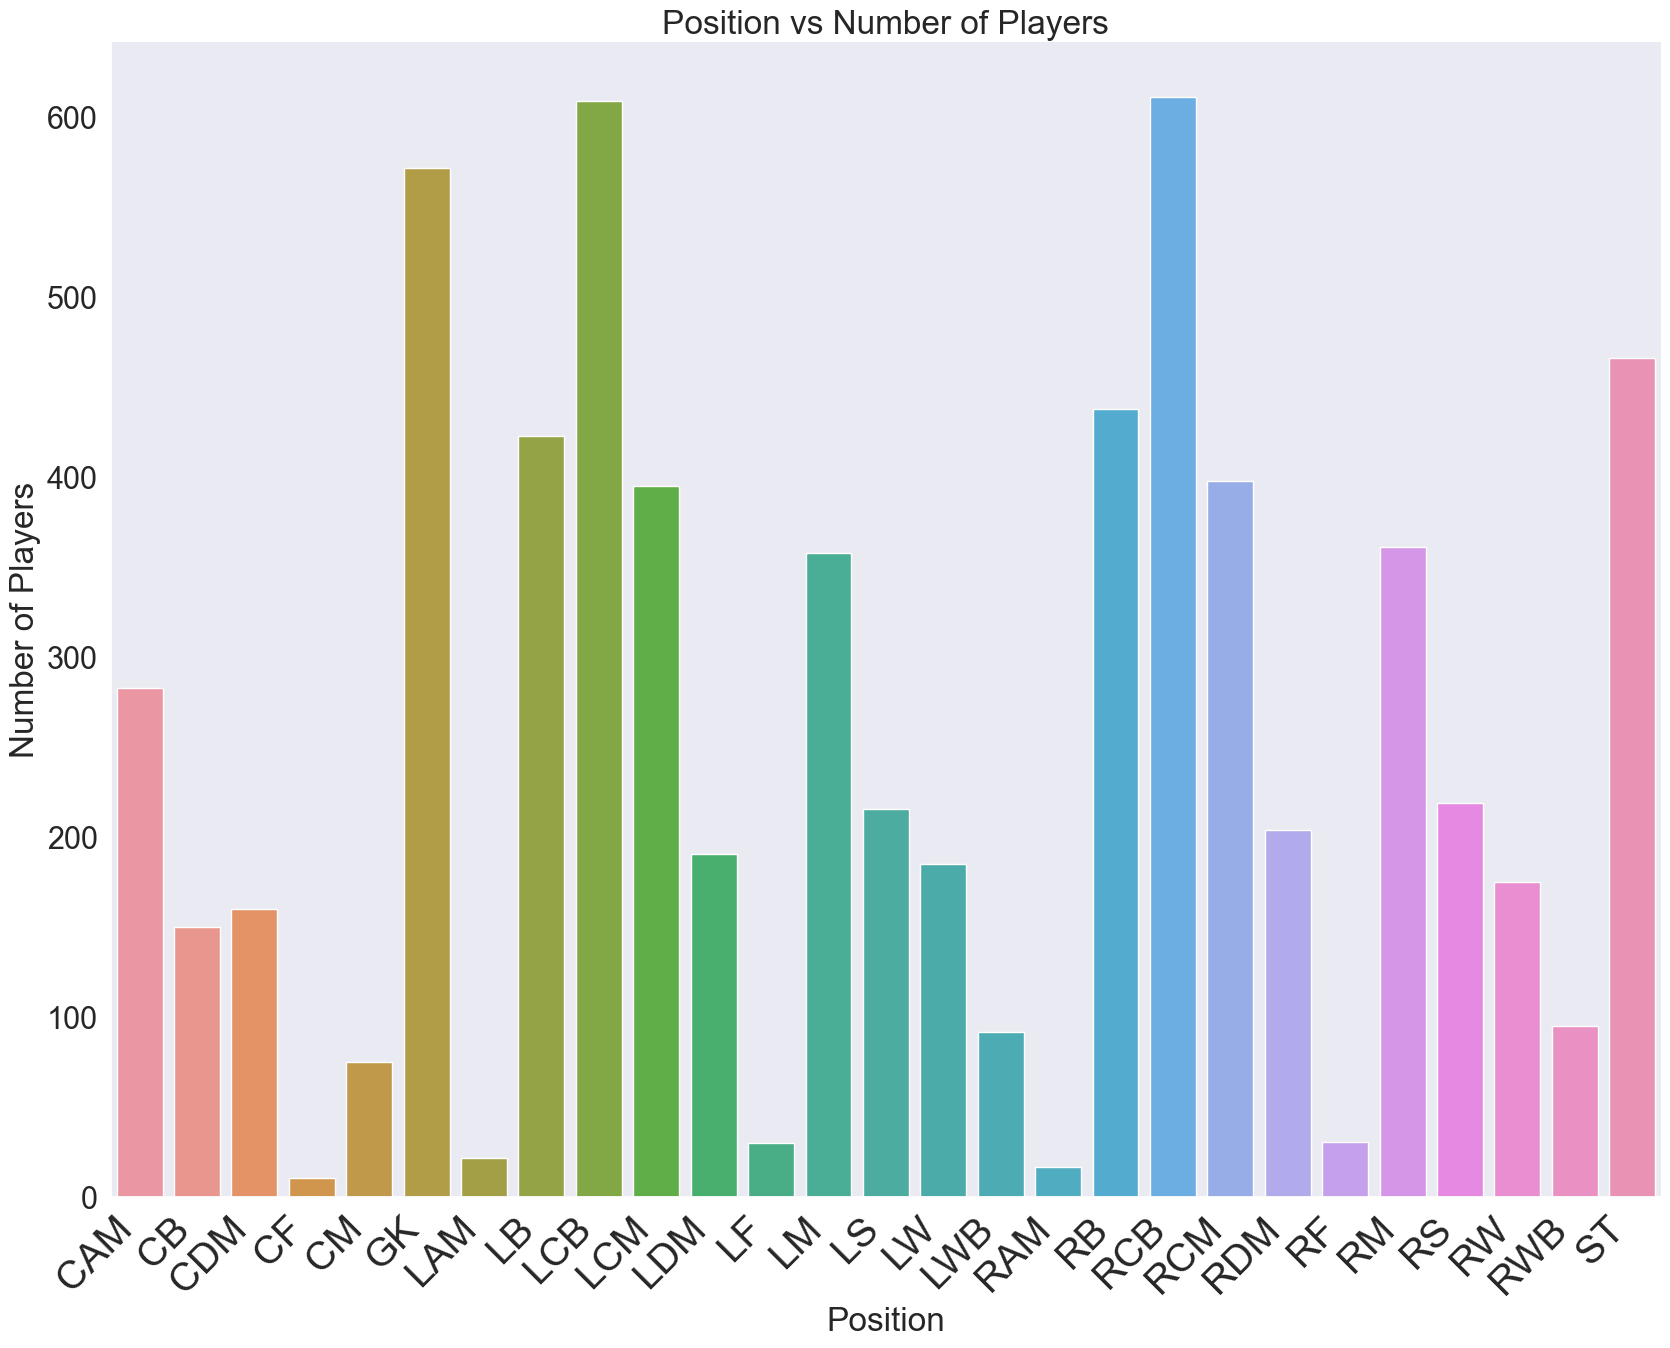

In [24]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Count") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

plt.title("Position vs Number of Players")
plt.xlabel("Position")
plt.ylabel("Number of Players")

From the above visualization, we can see that most players are in the LCB and RCB positions. Followed by GK and ST.
CF has the least number of players followed by RAM.  RF and LF also seem to have less players.

I would like to analyze if that has any effect on their value due to their scarcity.

Now, position vs normailsed wage

Text(0, 0.5, 'Normalised Wage')

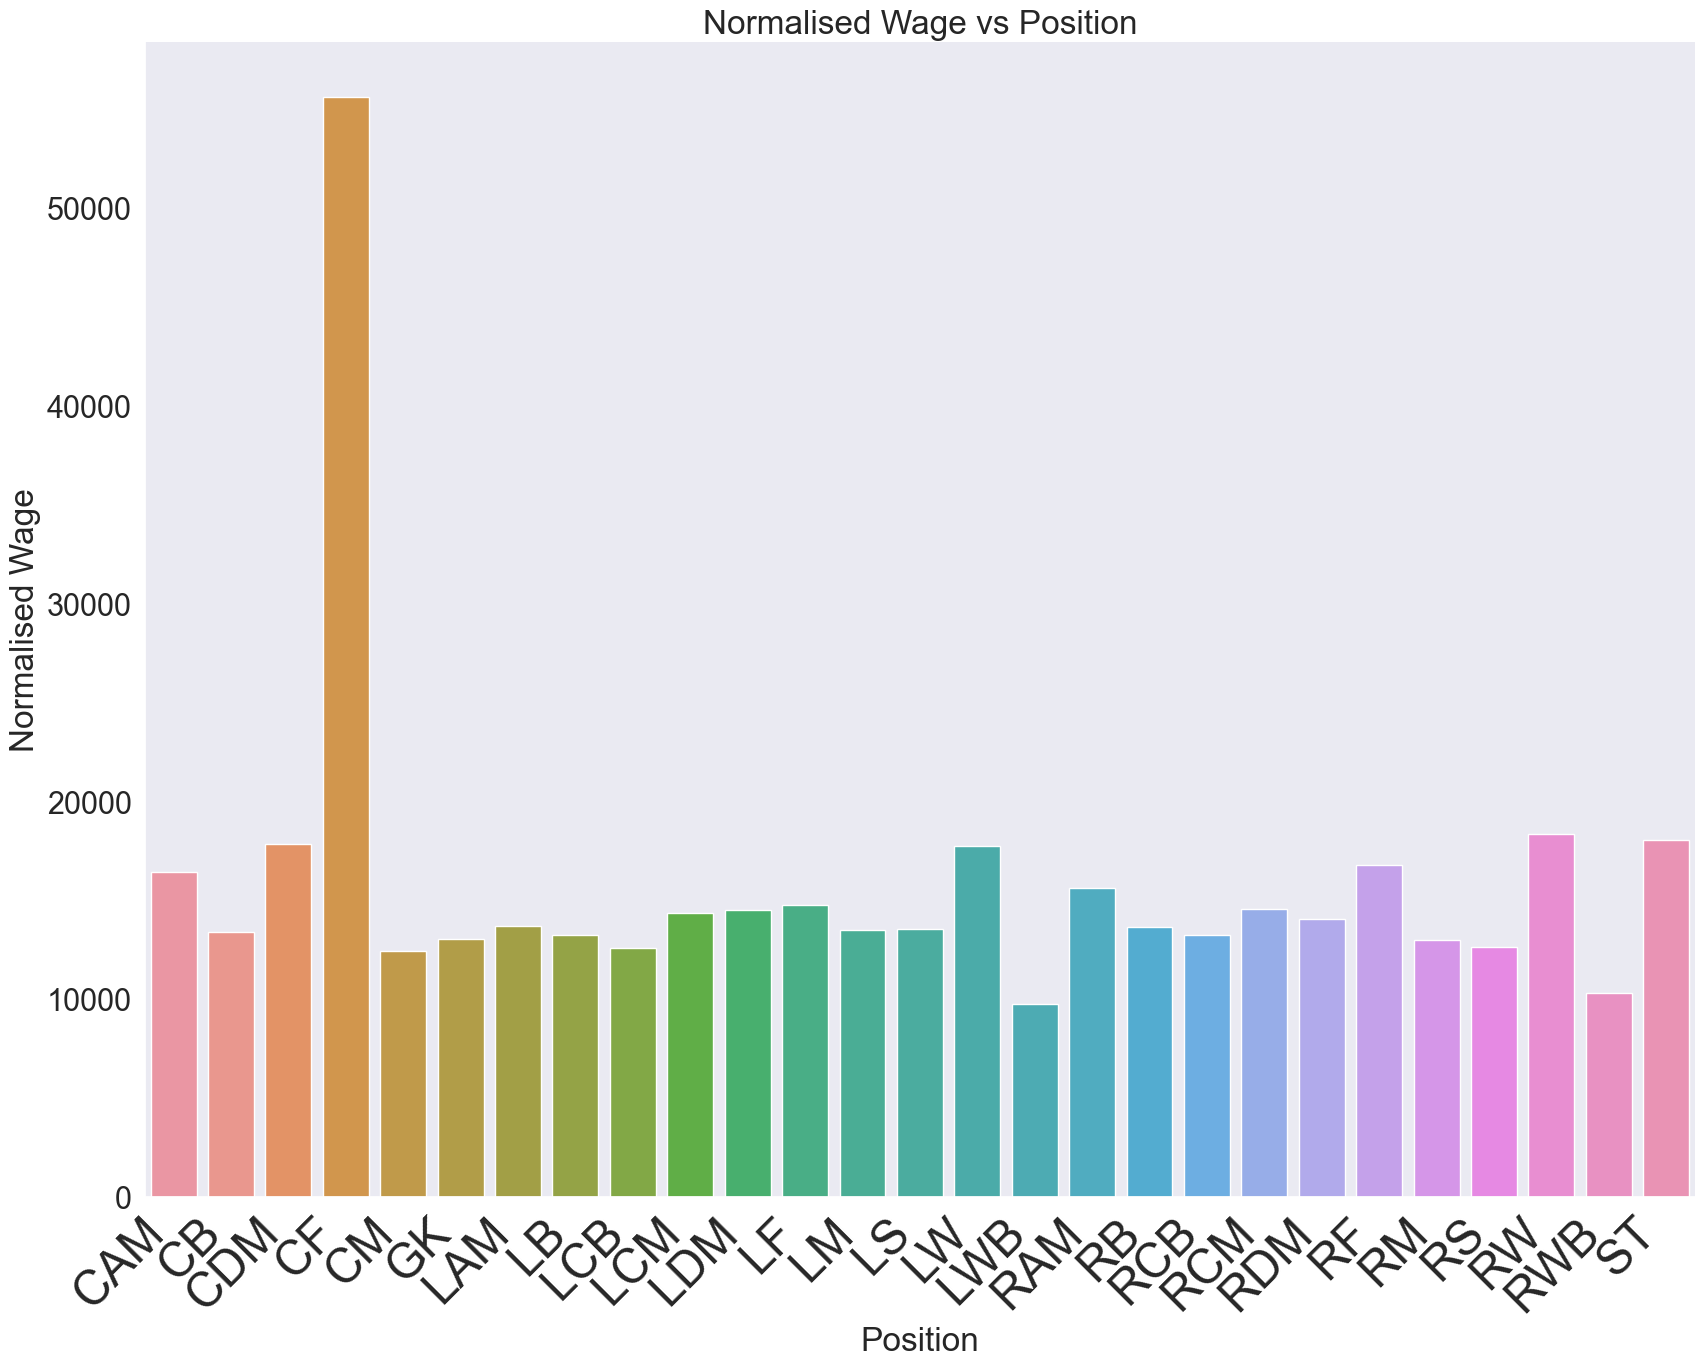

In [25]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Normalised Wage") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);

plt.title("Normalised Wage vs Position")
plt.xlabel("Position")
plt.ylabel("Normalised Wage")

When I normalized the data to account for the number of players and plotted the wage of a player with their value, I noticed that CF was the highest paid compared to any other position. All other positions are paid very similarly and that is around 1/3 the average wage of CF. ALthough RAM and CF have the same number of players, RAM is not even the second most paid position. This might be due to CF positions having more star players.

Now, the comparison between Normalised Value and Position

Text(0, 0.5, 'Normalised Value')

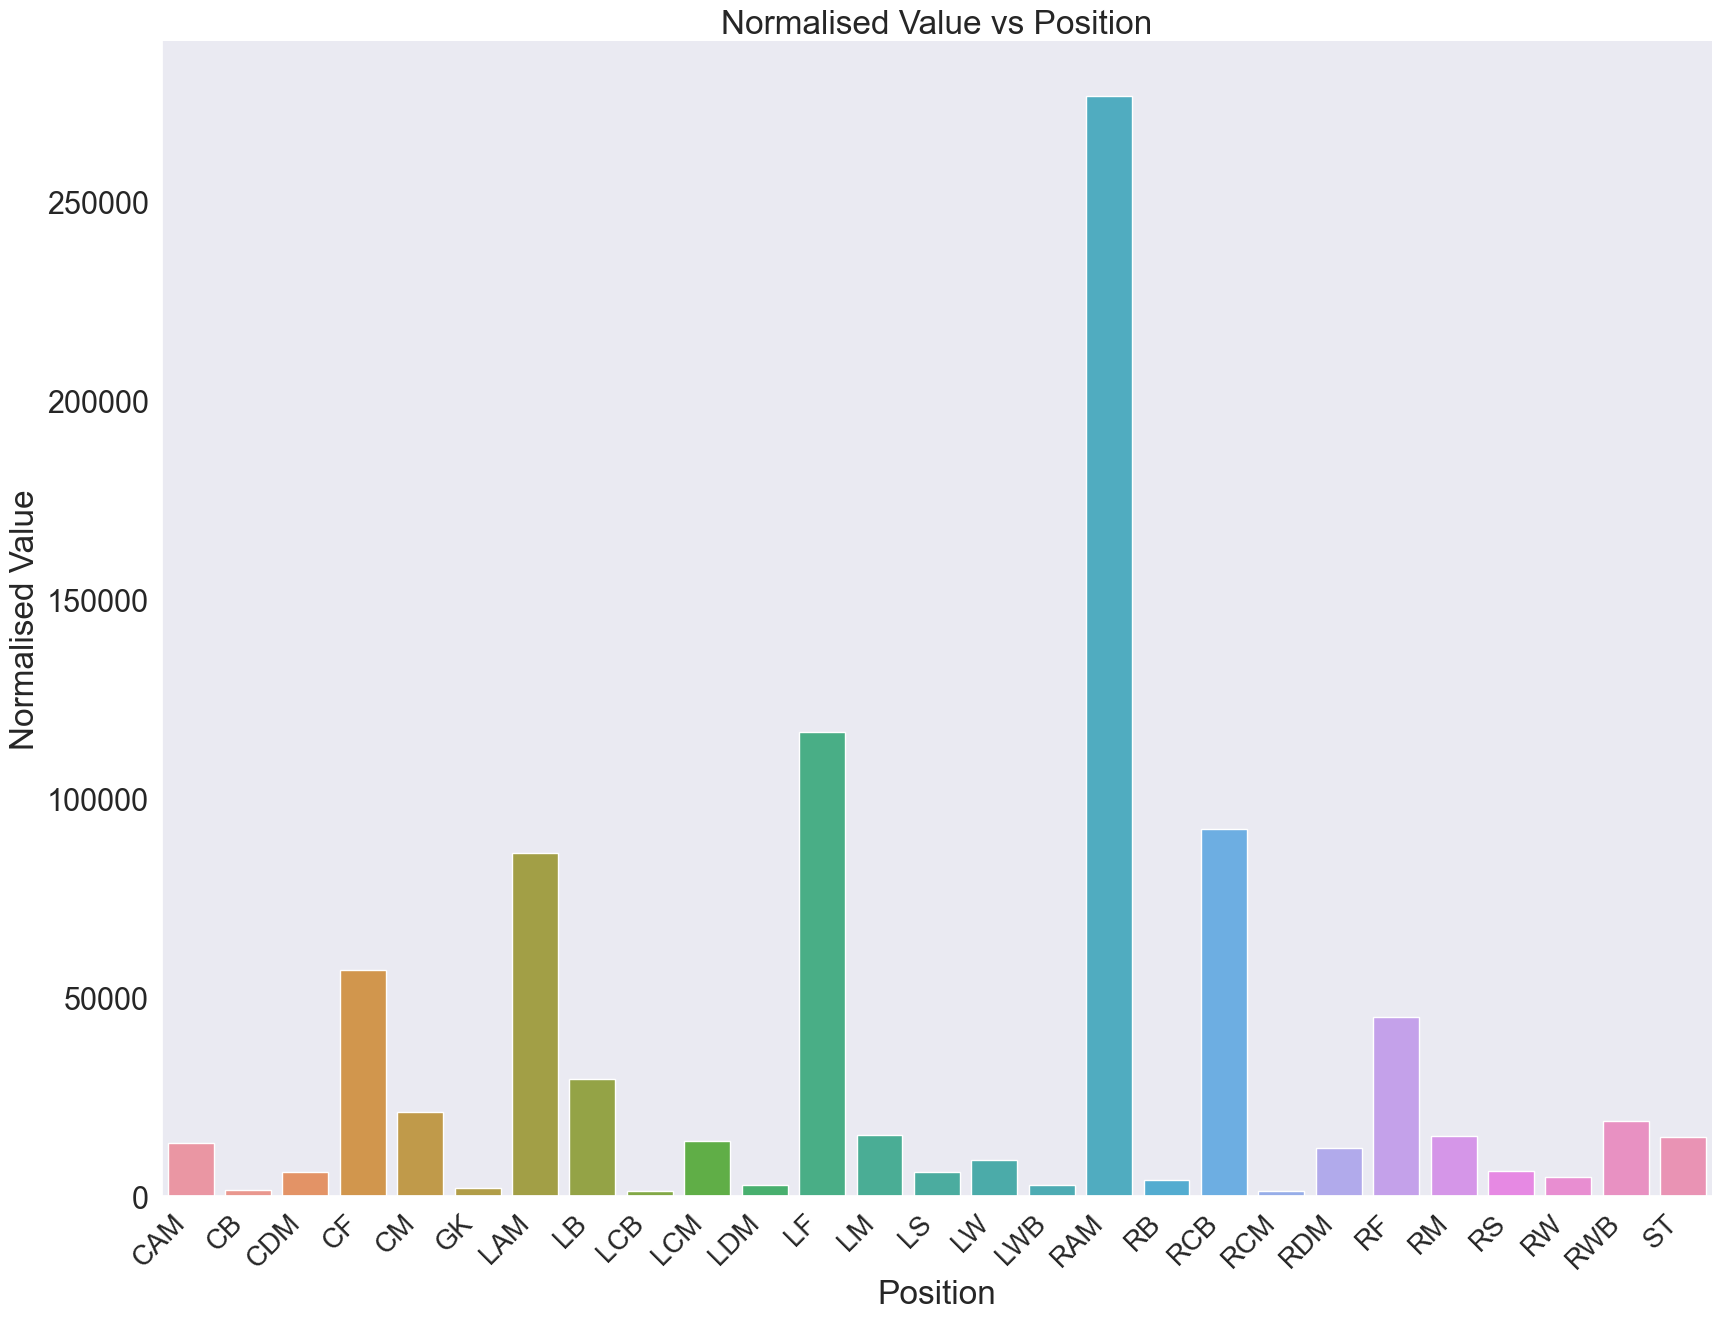

In [26]:
plt.figure(figsize=(20,15));
chart = sns.barplot(data=position_financials, x="Position", y=("Normalised Value") ) 
sns.despine()

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
);

plt.title("Normalised Value vs Position")
plt.xlabel("Position")
plt.ylabel("Normalised Value")

RAM position players are most valuable players followed by LF, LAM, RCB and CF. This is surprising considering that CF players were payed much higher than any position. This maybe due to the fact that most CF players are star players and bring in a lot of sponsors for the teams compared to other positions.

### Conclusion

In this milestone, we explored the relationships between the financial aspects (wage and value) of players to different attribute and made some findings. We were able to compare the different countries and positions. 
<br>

Findings:
1. Age has no direct correlation to value. But, overall has some correlation to the age and value. From this, we can see that there might be some indirect correlation between age and value.
1. Wage and Release Clause have a linear relationship with Value
1. On average, players from Europe and South America are valued more and have higher wages
1. CF and RAM are the most rarest players. CF players are the most paid and RAM players are the most valued. They both are not in the top 3 of the other category.


In [27]:
# Saving the processed datasets
data.to_csv('../data/processed/processed_data_main.csv')
position_financials.to_csv('../data/processed/processed_data_position_financials.csv')

In [28]:
"""
df2_test = pd.DataFrame(dict(data['Nationality'].value_counts()).items(), columns = ['Country', 'Number of Players'])
df_test = pd.merge(total_wage_by_country_df, total_value_by_country_df)
df_test =  pd.merge(df_test, df2_test)
df_test
"""
#data['Nationality'].value_counts()
#pd.DataFrame(dict(data['Nationality'].value_counts()).items(), columns = ['Country', 'Number of Players'])
#pd.DataFrame(list(total_value_by_country.items()), columns = ['Country', 'Total Value'])

"\ndf2_test = pd.DataFrame(dict(data['Nationality'].value_counts()).items(), columns = ['Country', 'Number of Players'])\ndf_test = pd.merge(total_wage_by_country_df, total_value_by_country_df)\ndf_test =  pd.merge(df_test, df2_test)\ndf_test\n"